In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("train.csv")
df.head()

,text,sentiment
0,"oh Marly, I`m so sorry!! I hope you find her...",neutral
1,Playing Ghost Online is really interesting. Th...,positive
2,is cleaning the house for her family who is co...,neutral
3,gotta restart my computer .. I thought Win7 wa...,neutral
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,neutral


In [2]:
df.describe()

,text,sentiment
count,27447,27448
unique,27410,3
top,#NAME?,neutral
freq,38,11106


In [3]:
df.shape

(27448, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27448 entries, 0 to 27447
Data columns (total 2 columns):
text         27447 non-null object
sentiment    27448 non-null object
dtypes: object(2)
memory usage: 429.0+ KB


In [5]:
df.dropna(axis = 0,inplace = True)
df.shape

(27447, 2)

# Data Preprocesssing

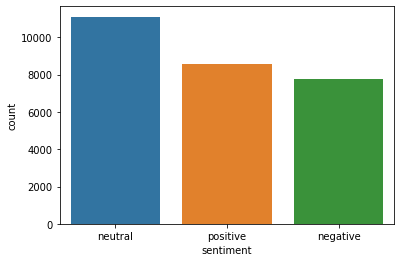

In [6]:
sns.countplot(df['sentiment'])
#however it is impossible to generate synthetic text data for balancing, so we do not balance the data

In [7]:
#removal of stop words
import nltk #nlp library
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words("english")
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,text,sentiment
0,"oh Marly, I`m sorry!! I hope find soon!! <3 <3",neutral
1,Playing Ghost Online really interesting. The n...,positive
2,cleaning house family comming later today..,neutral
3,gotta restart computer .. I thought Win7 suppo...,neutral
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,neutral


In [8]:
#replacing abbreviations and special characters
'''import csv #contains dictionary having abbreviations(keys) and phrases(values)
import re  #regular expression -to remove any special characters

def translator(input_string):
    input_string = input_string.split(" ")
    
df['text'] = df['text'].apply(lambda x: translator(x))
#print(df[text].head)'''
print("")

In [9]:
#Stemming
from nltk.stem import PorterStemmer
#nltk.download('punkt')
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
df.head()

,text,sentiment
0,"oh marly, i`m sorry!! I hope find soon!! <3 <3",neutral
1,play ghost onlin realli interesting. the new u...,positive
2,clean hous famili com later today..,neutral
3,gotta restart comput .. I thought win7 suppos ...,neutral
4,see wat I mean bout foll0w friidays... it` cal...,neutral


In [10]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lemma = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
df.head()

,text,sentiment
0,"oh marly, i`m sorry!! I hope find soon!! <3 <3",neutral
1,play ghost onlin realli interesting. the new u...,positive
2,clean hous famili com later today..,neutral
3,gotta restart comput .. I thought win7 suppos ...,neutral
4,see wat I mean bout foll0w friidays... it` cal...,neutral


In [11]:
#removing punctuation
import re
def remove_punct(text):
    text = re.sub('http://[A-Za-z0-9./]+','',text) #removes any https links
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    return text
df['text'] = df['text'].apply(remove_punct)
df.head()

,text,sentiment
0,oh marly i m sorry I hope find soon,neutral
1,play ghost onlin realli interesting the new u...,positive
2,clean hous famili com later today,neutral
3,gotta restart comput I thought win suppos p...,neutral
4,see wat I mean bout follw friidays it call...,neutral


In [12]:
#Spell correction
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0          oh mary  i m sorry   I hope find soon      
1    play ghost online really interesting  the new ...
2                 clean house family com later today  
3    gutta start compute    I thought win suppose p...
4    see wat I mean bout follow friday    it  call ...
Name: text, dtype: object

In [13]:
#capitalizing the tweets
df['text'] = df['text'].apply(lambda x: " ".join([word.upper() for word in x.split()]))
df['text'].head()

0                  OH MARLY I M SORRY I HOPE FIND SOON
1    PLAY GHOST ONLIN REALLI INTERESTING THE NEW UP...
2                    CLEAN HOUS FAMILI COM LATER TODAY
3    GOTTA RESTART COMPUT I THOUGHT WIN SUPPOS PUT ...
4    SEE WAT I MEAN BOUT FOLLW FRIIDAYS IT CALL LOS...
Name: text, dtype: object

In [14]:
#tokenizing

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def token(text):
    return tknzr.tokenize(text)
df['tokenized'] = df['text'].apply(token) 
df.head()

#method 2
#def tokenization(text):
#    return text.split()

#df['Tweet_tokenized'] = df['text'].apply(tokenization)
#df.head()

,text,sentiment,tokenized
0,OH MARLY I M SORRY I HOPE FIND SOON,neutral,"[OH, MARLY, I, M, SORRY, I, HOPE, FIND, SOON]"
1,PLAY GHOST ONLIN REALLI INTERESTING THE NEW UP...,positive,"[PLAY, GHOST, ONLIN, REALLI, INTERESTING, THE,..."
2,CLEAN HOUS FAMILI COM LATER TODAY,neutral,"[CLEAN, HOUS, FAMILI, COM, LATER, TODAY]"
3,GOTTA RESTART COMPUT I THOUGHT WIN SUPPOS PUT ...,neutral,"[GOTTA, RESTART, COMPUT, I, THOUGHT, WIN, SUPP..."
4,SEE WAT I MEAN BOUT FOLLW FRIIDAYS IT CALL LOS...,neutral,"[SEE, WAT, I, MEAN, BOUT, FOLLW, FRIIDAYS, IT,..."


# WORDCLOUD

## To find out how well the given sentiments are distributed across the dataset

### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.
_______________________________________________________________________________________________________________________________

### For Positive Sentiments

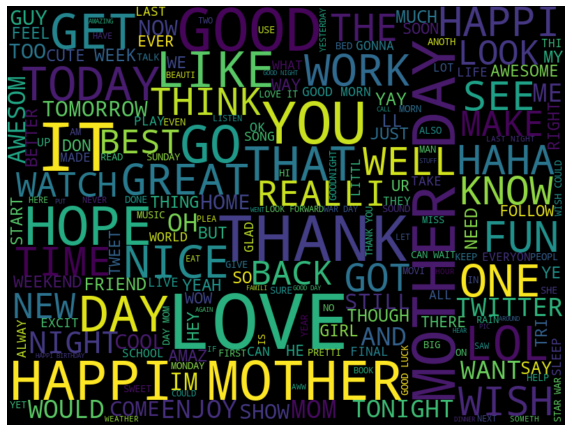

In [15]:
pos = ' '.join([text for text in df['text'][df['sentiment'] == 'positive']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(pos)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## For Negative Sentiments

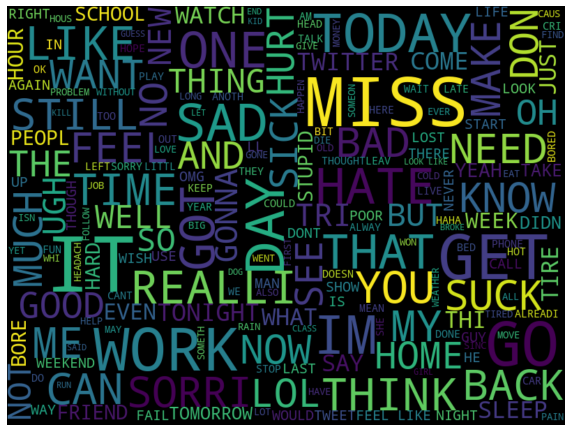

In [16]:
negatives = ' '.join([text for text in df['text'][df['sentiment'] == 'negative']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(negatives)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## For Neutral Sentiments

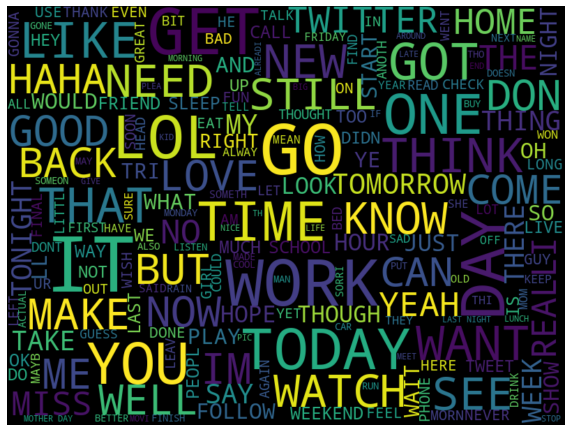

In [17]:
neu = ' '.join([text for text in df['text'][df['sentiment'] == 'neutral']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(neu)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Modelling

In [18]:
#label encoding
df['sentiment'] = df['sentiment'].map({'neutral':0,'positive':1,'negative':2})

## TF-IDF Vectorizer

### Before we let our data to train we have to numerically represent the preprocessed data by creating vectors from the text. TF-IDF enables us to gives us a way to associate each word in a document with a number that represents how relevant each word is in that document. Then, documents with similar, relevant words will have similar vectors.
### TF-IDF is a product of two terms: TF and IDF.

### Term Frequency is equal to the number of times a word occurs in a specific document
    # TF  = (Frequency of a word in the document)/(Total words in the document)
    
### Inverse Document Frequency for a specific word is equal to the total number of documents, divided by the number of documents that contain that specific word.
    #IDF = Log((Total number of docs)/(Number of docs containing the word))
    
### The lower the IDF value of a word, the less unique it is to any particular document. The higher the score, the more relevant that word is in that particular document.
_______________________________________________________________________________________________________________________________

In [19]:
#With Tfidftransformer we can systematically compute word counts using CountVectorizer and then compute the Tf-idf scores followed by IDF values.
#With Tfidfvectorizer it computes the word counts, IDF values, and Tf-idf scores all 3 using the same dataset.

from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=5000, max_df=0.7)  
x = tfidfconverter.fit_transform(df['text']).toarray() #this is x(used to train the model)that has text converted to vectors

## LOGISTIC REGRESSION

In [20]:
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y = df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 1000000)
#scores = cross_val_score(lr, x_train,y_train, cv=10)
logreg = lr.fit(x_train,y_train)
prediction = logreg.predict(x_test)
metrics.accuracy_score(y_test,prediction)

0.6983606557377049

In [22]:
metrics.confusion_matrix(y_test, prediction)

array([[1699,  251,  297],
       [ 463, 1226,   84],
       [ 481,   80,  909]], dtype=int64)

### accuracy = 0.70

In [23]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.64      0.76      0.69      2247
           1       0.79      0.69      0.74      1773
           2       0.70      0.62      0.66      1470

    accuracy                           0.70      5490
   macro avg       0.71      0.69      0.70      5490
weighted avg       0.71      0.70      0.70      5490



## KNN

In [24]:
#taking a very long time to execute
'''from sklearn.neighbors import KNeighborsClassifier

for K in range(9):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    #scores = cross_val_score(neigh, x_train,y_train, cv=10)
    neigh.fit(x_train, y_train) 
    prediction = neigh.predict(x_test)
    print ("Accuracy is ", accuracy_score(y_test,prediction)*100,"% for K-Value:",K_value)'''
print("")

## MULTINOMIAL  NB

In [25]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(x_train, y_train)
prediction = naive.predict(x_test)

metrics.accuracy_score(y_test, prediction)

0.6364298724954462

In [26]:
metrics.confusion_matrix(y_test, prediction)

array([[1708,  283,  256],
       [ 656, 1047,   70],
       [ 649,   82,  739]], dtype=int64)

### accuracy = 0.64

In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      2247
           1       0.74      0.59      0.66      1773
           2       0.69      0.50      0.58      1470

    accuracy                           0.64      5490
   macro avg       0.67      0.62      0.63      5490
weighted avg       0.66      0.64      0.63      5490



In [28]:
#SVM
'''from sklearn.svm import SVC
linsvc = SVC(kernel='linear')
linsvc.fit(x_train,y_train)
prediction = linsvc.predict(x_test)
metrics.accuracy_score(y_test, prediction)'''
print("")

In [57]:
#random forest
'''from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
# Train the model on training data
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
metrics.accuracy_score(y_test,prediction)'''
print("")

# TESTING ON UNSEEN DATA(validation.csv)

In [29]:
vds = pd.read_csv("validation.csv")
vds.head()

,text
0,Last session of the day http://twitpic.com/67ezh
1,Shanghai is also really exciting (precisely -...
2,"Recession hit Veronique Branquinho, she has to..."
3,happy bday!
4,http://twitpic.com/4w75p - I like it!!


In [30]:
vds.describe()

,text
count,3534
unique,3530
top,#NAME?
freq,5


In [31]:
vds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 1 columns):
text    3534 non-null object
dtypes: object(1)
memory usage: 27.7+ KB


In [32]:
vds.shape

(3534, 1)

In [33]:
vds.dropna(axis = 0,inplace = True)
vds.shape
#hence no null values

(3534, 1)

# Data Preprocesssing

In [34]:
#removal of stop words
import nltk #nlp library
from nltk.corpus import stopwords
stop = stopwords.words("english")
vds['text'] = vds['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
vds.head()

,text
0,Last session day http://twitpic.com/67ezh
1,Shanghai also really exciting (precisely -- sk...
2,"Recession hit Veronique Branquinho, quit compa..."
3,happy bday!
4,http://twitpic.com/4w75p - I like it!!


In [35]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
vds['text'] = vds['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
vds.head()

,text
0,last session day http://twitpic.com/67ezh
1,shanghai also realli excit (precis -- skyscrap...
2,"recess hit veroniqu branquinho, quit company, ..."
3,happi bday!
4,http://twitpic.com/4w75p - I like it!!


In [36]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
vds['text'] = vds['text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
vds.head()

,text
0,last session day http://twitpic.com/67ezh
1,shanghai also realli excit (precis -- skyscrap...
2,"recess hit veroniqu branquinho, quit company, ..."
3,happi bday!
4,http://twitpic.com/4w75p - I like it!!


In [37]:
#removing punctuation
import re
def remove_punct(text):
    text = re.sub('http://[A-Za-z0-9./]+','',text) #removes any https links
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    return text
vds['text'] = vds['text'].apply(remove_punct)
vds.head()

,text
0,last session day
1,shanghai also realli excit precis skyscrap...
2,recess hit veroniqu branquinho quit company ...
3,happi bday
4,I like it


In [38]:
#Spell correction
from textblob import TextBlob
vds['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    last session day 
1    shanghai also really exit  precise    skyscrap...
2    recess hit veroniqu branquinho  quit company  ...
3                                           happy day 
4                                          I like it  
Name: text, dtype: object

In [39]:
#tokenizing
def tokenization(text):
    return text.split()

vds['Tweet_tokenized'] = vds['text'].apply(tokenization)
vds.head()

,text,Tweet_tokenized
0,last session day,"[last, session, day]"
1,shanghai also realli excit precis skyscrap...,"[shanghai, also, realli, excit, precis, skyscr..."
2,recess hit veroniqu branquinho quit company ...,"[recess, hit, veroniqu, branquinho, quit, comp..."
3,happi bday,"[happi, bday]"
4,I like it,"[I, like, it]"


# MODELLING

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=5000, max_df=0.7)  
x_valid = tfidfconverter.fit_transform(vds['text']).toarray()

###  LOGISTIC REGRESSION

In [41]:
import pickle #basically should contain all the trained models that can be used again( to avoid reloading of models)
  
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(lr) 
  
# Load the pickled model 
lr_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
y_pred = lr_from_pickle.predict(x_valid) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
sentiment1 = lr_from_pickle.predict(x_test) 
sentiment1

array([0, 0, 2, ..., 0, 0, 0], dtype=int64)

In [50]:
vds['sentiment']=pd.Series(y_pred)
#del vds['Tweet_tokenized']
vds.head()

,text,sentiment
0,last session day,0
1,shanghai also realli excit precis skyscrap...,0
2,recess hit veroniqu branquinho quit company ...,0
3,happi bday,0
4,I like it,0


In [52]:
vds.sentiment[vds.sentiment == 1] = 'positive'
vds.sentiment[vds.sentiment == 0] = 'neutral'
vds.sentiment[vds.sentiment == 2] = 'negative'
vds['sentiment']
vds.to_csv('logistic_regression.csv')

### Multinomial NB

In [45]:
import pickle #basically should contain all the trained models that can be used again( to avoid reloading of models)
  
# Save the trained model as a pickle string. 
saved_model2 = pickle.dumps(naive) 
  
# Load the pickled model 
nb_from_pickle = pickle.loads(saved_model2) 
  
# Use the loaded pickled model to make predictions 
y_predicted = nb_from_pickle.predict(x_valid) 
y_predicted

array([0, 0, 2, ..., 1, 0, 0], dtype=int64)

In [53]:
vds['sentiment']=pd.Series(y_predicted)
#del vds['Tweet_tokenized']
vds.head()

,text,sentiment
0,last session day,0
1,shanghai also realli excit precis skyscrap...,0
2,recess hit veroniqu branquinho quit company ...,2
3,happi bday,0
4,I like it,0


In [54]:
vds.sentiment[vds.sentiment == 1] = 'positive'
vds.sentiment[vds.sentiment == 0] = 'neutral'
vds.sentiment[vds.sentiment == 2] = 'negative'
vds['sentiment']
vds.to_csv('naive_bayes.csv')